In [1]:
import os

import rosbag
import rosbag_pandas
import numpy as np
import pandas as pd
import timeit

from pypeln import thread as th

In [2]:
BAG_FOLDER = '../data/'

In [3]:
files = os.listdir(BAG_FOLDER)
files

['1540903721.881372.bag',
 '1540903356.769342.bag',
 '1540903261.7673705.bag',
 '1540903073.8556726.bag',
 '1540903060.3074574.bag',
 '1540903785.2244124.bag',
 '1540903763.6180303.bag',
 '1540903293.9934628.bag',
 '1540903039.628147.bag',
 '1540903859.8403544.bag',
 '1540903523.9282293.bag',
 '1540903410.8630018.bag',
 '1540903481.789626.bag',
 '1540903406.587463.bag',
 '1540903241.1934242.bag',
 '1540903711.6101124.bag',
 '1540903700.719997.bag',
 '1540903002.4500268.bag',
 '1540903577.347445.bag',
 '1540903251.5044699.bag',
 '1540903314.5416625.bag',
 '1540903502.331351.bag',
 '1540903741.3281016.bag',
 '1540903429.3456457.bag',
 '1540903701.3935814.bag',
 '1540903690.4094846.bag',
 '1540903096.5503445.bag',
 '1540903230.9148943.bag',
 '1540903449.8801162.bag',
 '1540903460.156222.bag',
 '1540903134.6755161.bag',
 '1540903396.3337927.bag',
 '1540903094.3619118.bag',
 '1540903787.3920033.bag',
 '1540903668.8827617.bag',
 '1540903512.607595.bag',
 '1540903818.7787163.bag',
 '154090358

In [4]:
def bag2df(file_name):
    df = None
    try:
        df = rosbag_pandas.bag_to_dataframe(BAG_FOLDER + file_name) 
    except TypeError:
        print(file_name)
    return df 

In [6]:
stage = th.map(bag2df, files, workers = 14)

data = list(stage)
print(len(data))

100


In [7]:
df = pd.concat(data)

In [8]:
import ipympl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x = df.pose__pose_position_x
y = df.pose__pose_position_y
z = df.pose__pose_position_z

In [9]:
%matplotlib notebook

In [27]:
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)

<IPython.core.display.Javascript object>


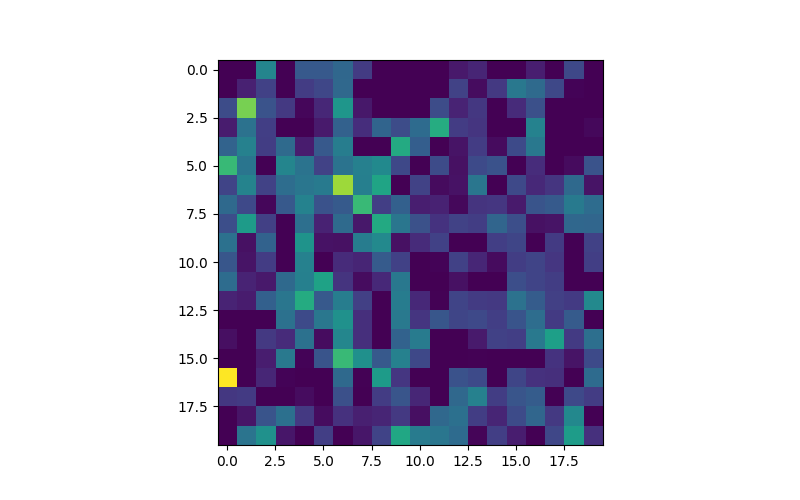

In [28]:
world = np.zeros((X.shape[0], Y.shape[0]))
fig = plt.figure()

plt.rcParams['figure.figsize'] = [8, 5]

for x_, y_ in zip(x,y):
    xi = np.digitize(x_, X) - 1
    yi = np.digitize(y_, Y) - 1
    world[xi, yi] += 1    
    
world /= len(x)
world = world.T
plt.imshow(world * 255)
plt.show()

In [12]:
Xm, Ym = np.meshgrid(X, Y)

In [29]:
world.shape, Xm.shape, Ym.shape

((20, 20), (20, 20), (20, 20))

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

<IPython.core.display.Javascript object>


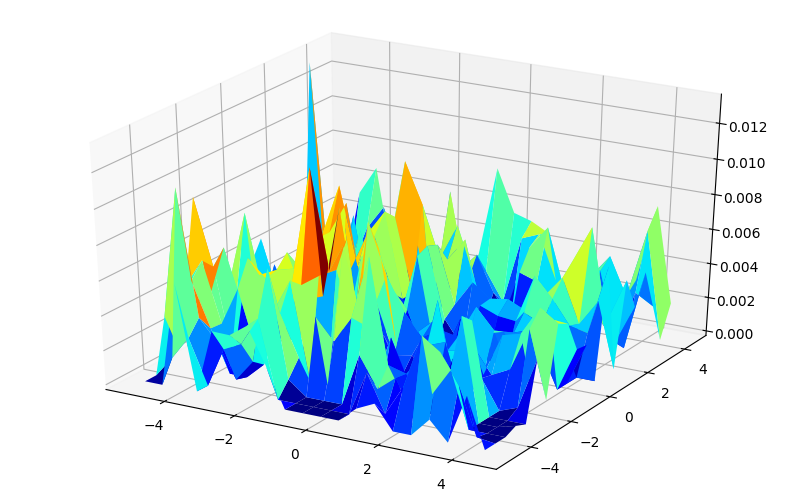

In [31]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Xm, Ym, world, cmap=cm.jet, linewidth=0.1)
plt.show()